# Projet arbres de Grenoble jour 2

Travail sur les set, dict et un peu d'analyse de données.

In [1]:
# coding: utf-8

import csv
from pathlib import Path

In [3]:
data_path = Path.cwd().parent / 'data/ESP_PUBLIC.IDENTITE_ARBRE.csv'
print(data_path.exists())

True


In [6]:
with open(data_path) as data_file :
    dictReader = csv.DictReader(data_file)
    data_dict = []
    for row in dictReader :
        data_dict.append(row)

In [9]:
data_dict[0].keys()

odict_keys(['\ufeffELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE', 'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE', 'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE', 'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION', 'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU', 'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE', 'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE', 'GeoJSON'])

Affichage des différents genres botaniques et mesure du temps nécessaire.

In [18]:
# %%timeit
genres = [elem['GENRE_BOTA'] for elem in data_dict]
genres = set(genres)

In [12]:
%%timeit
genres = []
for elem in data_dict :
    if elem['GENRE_BOTA'] not in genres :
        genres.append(elem['GENRE_BOTA'])

17.4 ms ± 551 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
genres = set()
for elem in data_dict :
    genres.add(elem['GENRE_BOTA'])

20.1 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
print(genres)
print(f'Il y a {len(genres)} genres botaniques représentés.')

{'', 'Nyssa', 'Zelkova', 'Cephalotaxus', 'Phellodendron', 'Liriodendron', 'Photinia', 'Cupressocyparis', 'Aesculus', 'Ulmus', 'Fagus', 'Platanus', 'Malus', 'Clerodendron', 'Taxodium', 'Ptelea', 'Crataegus', 'Celtis', 'Juglans', 'Paulownia', 'Pterostyrax', 'Hibiscus', 'Pyrus', 'Syringa', 'Catalpa', 'Chitalpa', 'Fraxinus', 'Ficus', 'Calocedrus', 'Fontanesia', 'Larix', 'Pseudotsuga', 'Pteroceltis', 'Cupressus', 'Koelreuteria', 'Ginkgo', 'Carpinus', 'Sequoiadendron', 'Thuja', 'Sterculia', 'Corylus', 'Pterocarya', 'Buxus', 'Hovenia', 'Tilia', 'Sequoia', 'Acer', 'Lagerstroemia', 'Juniperus', 'Sorbopyrus', 'Robinia', 'Ilex', 'Taxus', 'Trachycarpus', 'Ostrya', 'Laburnum', 'Gleditsia', 'Cedrus', 'Euodia', 'Alnus', 'Punica', 'Sorbus', 'Laurus', 'Idesia', 'Phillyrea', 'Libocedrus', 'Chamaecyparis', 'Cladastris', 'Mespilus', 'Halesia', 'Castanea', 'Olea', 'Sciadopitys', 'Rhamnus', 'Ligustrum', 'Broussonetia', 'Cryptomeria', 'Acacia', 'Sambucus', 'Populus', 'Cercidiphyllum', 'Sophora', 'Prunus', 'P

Identification des espèces

In [25]:
especes = set() # especes va être un set de tuples ('genre', 'espece')
for elem in data_dict :
    especes.add((elem['GENRE_BOTA'], elem['ESPECE']))
print(f'Il y a {len(especes)} especes botaniques représentés.')

Il y a 393 especes botaniques représentés.


In [26]:
('','') in especes

True

Comptage du nombre de représentants dans chaque genre

In [35]:
%%timeit
pop_genre = {} # dictionnaire {'genre': nombre}
for row in data_dict :
    if row['GENRE_BOTA'] in pop_genre :
        pop_genre[row['GENRE_BOTA']]+=1
    else :
        pop_genre[row['GENRE_BOTA']]=1
#print(pop_genre)

31.1 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%timeit
genres = [elem['GENRE_BOTA'] for elem in data_dict]
genres_uniques = set(genres)
pop_genre = {elem:genres.count(elem) for elem in genres_uniques}
#print(pop_genre)

474 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
print(pop_genre)

{'': 438, 'Nyssa': 1, 'Zelkova': 279, 'Cephalotaxus': 3, 'Phellodendron': 17, 'Liriodendron': 512, 'Photinia': 9, 'Cupressocyparis': 97, 'Aesculus': 462, 'Ulmus': 216, 'Fagus': 276, 'Platanus': 4615, 'Malus': 342, 'Clerodendron': 5, 'Taxodium': 11, 'Ptelea': 4, 'Crataegus': 115, 'Celtis': 224, 'Juglans': 73, 'Paulownia': 106, 'Pterostyrax': 6, 'Hibiscus': 3, 'Pyrus': 572, 'Syringa': 41, 'Catalpa': 117, 'Chitalpa': 7, 'Fraxinus': 1515, 'Ficus': 25, 'Calocedrus': 6, 'Fontanesia': 6, 'Larix': 5, 'Pseudotsuga': 1, 'Pteroceltis': 15, 'Cupressus': 212, 'Koelreuteria': 287, 'Ginkgo': 114, 'Carpinus': 1324, 'Sequoiadendron': 9, 'Thuja': 47, 'Sterculia': 1, 'Corylus': 204, 'Pterocarya': 54, 'Buxus': 15, 'Hovenia': 2, 'Tilia': 1776, 'Sequoia': 6, 'Acer': 5260, 'Lagerstroemia': 58, 'Juniperus': 4, 'Sorbopyrus': 1, 'Robinia': 269, 'Ilex': 30, 'Taxus': 203, 'Trachycarpus': 23, 'Ostrya': 74, 'Laburnum': 11, 'Gleditsia': 372, 'Cedrus': 415, 'Euodia': 2, 'Alnus': 816, 'Punica': 4, 'Sorbus': 100, 'Laur

Travail sur le genre le plus représenté

In [43]:
%%timeit
pop_max = 0
genre_max = ''
for (key,value) in pop_genre.items() :
    if value > pop_max :
        pop_max = value
        genre_max = key
#print(f'Le genre le plus représenté est {genre_max} avec {pop_max} individus.')

24.9 µs ± 33.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
import operator

In [44]:
%%timeit
# avec une méthode plus rapide ?
genre_max, pop_max = max(pop_genre.items(), key=operator.itemgetter(1))
#print(f'Le genre le plus représenté est {genre_max} avec {pop_max} individus.')

39.6 µs ± 60.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [54]:
%%timeit
# proportion par rapport au total
pop_totale = 0
#for (key,value) in pop_genre.items() :
for value in pop_genre.values() :
    pop_totale += value
#print(f'La proportion totale de {genre_max} est {pop_max/pop_totale*100:.1f} %.')

21.9 µs ± 24 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [56]:
#%%timeit
# même chose en succint
pop_totale = sum(pop_genre.values())
print(f'La proportion totale de {genre_max} est {pop_max/pop_totale*100:.1f} %.')

La proportion totale de Acer est 16.5 %.


Conclusion sur le genre : comme le genre le plus repésenté correspond à 16.5% du total, l'objectif de moins de 20% d'un genre est atteint.

In [67]:
tout_seul = [key for (key,value) in pop_genre.items() if value == 1]
for row in data_dict :
    if row['GENRE_BOTA'] in tout_seul :
        print(row['\ufeffELEM_POINT_ID'], row['GENRE_BOTA'])

4745 Sorbopyrus
16016 Poncinos
26962 Sciadopitys
11575 Castanea
38201 Laurus
33324 Rhamnus
22863 Sterculia
40701 Acacia
25732 Eucalyptus
33239 Staphylea
18619 Pseudotsuga
30294 Nyssa


Travail sur les espèces

In [61]:
espece = [elem['GENRE_BOTA']+' '+elem['ESPECE'] for elem in data_dict]
espece_unique = set(espece)
pop_espece = [(elem,espece.count(elem)) for elem in espece_unique]
# pop_espece est une liste de tuples ('genre espece', nb)

In [62]:
pop_espece

[('Metasequoia glyptostroboides', 84),
 ('Prunus laurocerasus', 9),
 ('Catalpa bignonoides', 117),
 ('Amélanchier alnifolia', 3),
 ('Quercus petraea', 126),
 ('Abies alba', 1),
 ('Hovenia dulcis', 2),
 ('Sorbopyrus auricularis', 1),
 ('Acer palmatum', 2),
 ('Pyrus pyrifolia', 3),
 ('Ligustrum ', 1),
 ('Ulmus ', 17),
 ('Salix triandra', 5),
 ('Mespilus germanica', 9),
 ('Populus ', 81),
 ('Acer ginnala', 50),
 ('Cedrus atlantica', 319),
 ('Pinus parviflora', 1),
 ('Ulmus campestris', 16),
 ('Liriodendron tulipifera', 511),
 ('Quercus cerris', 234),
 ('Acacia dealbata', 1),
 ('Thuja ', 21),
 ('Aesculus hippocastanum', 407),
 ('Ilex ', 2),
 ('Fraxinus velutina', 66),
 ('Chamaecyparis ', 2),
 ('Prunus subhirtella', 30),
 ('Diospyros lotus', 8),
 ('Prunus incisa', 7),
 ('Ptelea trifoliata', 4),
 ('Cupressus arizonica', 59),
 ('Prunus campanulata', 2),
 ('Cupressus ', 1),
 ('Quercus macrolepis', 1),
 ('Prunus schmittii', 8),
 ('Juglans ', 3),
 ('Ulmus laevis', 3),
 ('Cydonia vulgaris', 1),
 

In [72]:
#%%timeit
pop_max = 0
espece_max = ''
for (key,value) in pop_espece :
    if value > pop_max :
        pop_max = value
        espece_max = key
print(f"L'espèce la plus représentée est {espece_max} avec {pop_max} individus.")

L'espèce la plus représentée est Platanus acerifolia avec 4008 individus.


In [70]:
%%timeit
# avec une méthode plus rapide ?
espece_max, pop_max = max(pop_espece, key=operator.itemgetter(1))
#print(f"L'espèce la plus représentée est {espece_max} avec {pop_max} individus.")

108 µs ± 449 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [82]:
%%timeit
# proportion par rapport au total
pop_totale = 0
for (key,value) in pop_espece :
    pop_totale += value
#print(f'La proportion totale de {espece_max} est {pop_max/pop_totale*100:.1f} %.')

89.2 µs ± 80.8 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [84]:
#%%timeit
# même chose en succint
pop_totale = sum([elem[1] for elem in pop_espece])
print(f'La proportion totale de {espece_max} est {pop_max/pop_totale*100:.1f} %.')

La proportion totale de Platanus acerifolia est 12.6 %.


Conclusion sur les espèces : l'objectif de la métropole n'est pas atteint avec 12.6% de Platanus acerifolia parmis la population.

In [86]:
tout_seul = [key for (key,value) in pop_espece if value == 1]
print(f"{len(tout_seul)} représentants uniques d'especes.")
for row in data_dict :
    if (row['GENRE_BOTA']+" "+row['ESPECE']) in tout_seul :
        print(row['\ufeffELEM_POINT_ID'], row['GENRE_BOTA'], row['ESPECE'])

65 représentants uniques d'especes.
42802 Cedrela sinense
23352 Chamaecyparis pisifera
23353 Pinus strobus
32794 Quercus fraxinifolia
23361 Magnolia heptapeta
16017 Juniperus drupacea
4745 Sorbopyrus auricularis
16016 Poncinos 
26962 Sciadopitys verticillata
12375 Juniperus virginiana
11575 Castanea sativa
38032 Malus excelsior
38028 Pyrus bignonoides
38019 Prunus aquifolium
38007 Malus cerasifera
38005 Malus avium
38201 Laurus nobilis
32559 Acer opalus
41403 Abies alba
12823 Fraxinus quadrangulata
36744 Crataegus prunifolia
33324 Rhamnus alaternus
22863 Sterculia foetida
36585 Magnolia liliflora
42781 Quercus macrolepis
40701 Acacia dealbata
40335 Olea 
36105 Pyrus elaeagnifolia
35243 Ficus 
22018 Cydonia vulgaris
42823 Malus denboerii
42330 Pinus parviflora
42328 Pinus griffithii
36743 Abies koreana
25732 Eucalyptus gunii
42062 Cladastris kentukea
42041 Cladastris 
41222 Cupressus 
32744 Acer zoeschense
37949 Prunus mahaleb
33239 Staphylea bumalda
39181 Quercus libani
26786 Quercus s

In [87]:
" " in espece_unique

True

## Evolution de la pratique de plantation au cours du temps

In [94]:
import matplotlib.pyplot as plt

Premiere implémentation : création d'un dictionnaire prenant toutes les années présentes et rescençant le nombre d'arbre plantés, le nombre d'arbres et le nom du genre dominant, le nombre d'arbres et le nom de l'espèce dominante.

In [118]:
#data_dict[0].keys()
annees = frozenset([elem['ANNEEDEPLANTATION'] for elem in data_dict])
genre_annee = {} # contient un dictionnaire pour chaque année des genres plantés avec leur nombre
espece_annee = {} # contient un dictionnaire pour chaque année des espèces plantées avec leur nombre
for row in data_dict :
    if row['ANNEEDEPLANTATION'] in genre_annee :
        if row['GENRE_BOTA'] in genre_annee[row['ANNEEDEPLANTATION']] :
            genre_annee[row['ANNEEDEPLANTATION']][row['GENRE_BOTA']] += 1
        else :
            genre_annee[row['ANNEEDEPLANTATION']][row['GENRE_BOTA']] = 1
    else :
        genre_annee[row['ANNEEDEPLANTATION']] = {row['GENRE_BOTA']:1}
        
    if row['ANNEEDEPLANTATION'] in espece_annee :
        if row['GENRE_BOTA']+" "+row['ESPECE'] in espece_annee[row['ANNEEDEPLANTATION']] :
            espece_annee[row['ANNEEDEPLANTATION']][row['GENRE_BOTA']+" "+row['ESPECE']] += 1
        else :
            espece_annee[row['ANNEEDEPLANTATION']][row['GENRE_BOTA']+" "+row['ESPECE']] = 1
    else :
        espece_annee[row['ANNEEDEPLANTATION']] = {row['GENRE_BOTA']+" "+row['ESPECE']:1}

In [103]:
espece_annee['1991']

{'Gleditsia triacanthos': 14,
 'Tilia tomentosa': 12,
 'Albizia julibrissin': 1,
 'Cupressus sempervirens': 12,
 'Pinus sylvestris': 4,
 'Corylus colurna': 5,
 'Cercis siliquastrum': 6,
 'Magnolia grandiflora': 12,
 'Morus nigra': 2,
 'Populus nigra': 6,
 'Pinus nigra': 1,
 'Liriodendron tulipifera': 25,
 'Juglans regia': 1,
 'Fraxinus americana': 14,
 'Fraxinus angustifolia': 2,
 'Malus floribunda': 1,
 'Acer platanoides': 2,
 'Acer pseudoplatanus': 3,
 'Prunus serrulata': 1,
 'Picea abies': 1,
 'Malus perpetu': 1,
 'Fraxinus excelsior': 6,
 'Tetradium daniellii': 4,
 'Betula alba': 1,
 'Sambucus nigra': 1,
 'Betula pendula': 4,
 'Liquidambar styraciflua': 1,
 'Prunus cerasifera': 1}

In [105]:
plantation_annee = {} # annee:{'tot': , 'max_genre': , 'genre': , 'max_espece': , 'espece':}
for annee in annees :
    tot = sum(genre_annee[annee].values())
    nom_genre, max_genre = max(genre_annee[annee].items(), key=operator.itemgetter(1))
    nom_espece, max_espece = max(espece_annee[annee].items(), key=operator.itemgetter(1))
    plantation_annee[annee] = {
        'tot': tot, 
        'max_genre': max_genre, 
        'genre': nom_genre, 
        'max_espece': max_espece, 
        'espece': nom_espece
    }

In [106]:
plantation_annee

{'': {'tot': 763,
  'max_genre': 397,
  'genre': '',
  'max_espece': 397,
  'espece': ' '},
 '2017': {'tot': 638,
  'max_genre': 77,
  'genre': 'Acer',
  'max_espece': 38,
  'espece': 'Platanus '},
 '2013': {'tot': 320,
  'max_genre': 76,
  'genre': 'Quercus',
  'max_espece': 45,
  'espece': 'Quercus castaneifolia'},
 '1971': {'tot': 69,
  'max_genre': 26,
  'genre': 'Platanus',
  'max_espece': 19,
  'espece': 'Platanus acerifolia'},
 '2004': {'tot': 349,
  'max_genre': 58,
  'genre': 'Prunus',
  'max_espece': 50,
  'espece': 'Pyrus calleryana'},
 '1968': {'tot': 112,
  'max_genre': 40,
  'genre': 'Acer',
  'max_espece': 29,
  'espece': 'Acer platanoides'},
 '1984': {'tot': 652,
  'max_genre': 165,
  'genre': 'Liquidambar',
  'max_espece': 165,
  'espece': 'Liquidambar styraciflua'},
 '1993': {'tot': 142,
  'max_genre': 20,
  'genre': 'Quercus',
  'max_espece': 17,
  'espece': 'Pinus nigra'},
 '2008': {'tot': 215,
  'max_genre': 38,
  'genre': 'Gleditsia',
  'max_espece': 38,
  'espece

In [109]:
del plantation_annee[''] # supression des annees manquantes

In [114]:
[int(key) for key in plantation_annee.keys()]

[2017,
 2013,
 1971,
 2004,
 1968,
 1984,
 1993,
 2008,
 2012,
 1991,
 1960,
 2018,
 1983,
 1981,
 1959,
 1965,
 2000,
 1950,
 2010,
 1998,
 1994,
 1969,
 1972,
 1982,
 1966,
 2019,
 1999,
 1976,
 1995,
 1985,
 1964,
 1955,
 1975,
 1996,
 1979,
 2011,
 2015,
 1988,
 1986,
 2009,
 1973,
 1970,
 2014,
 2006,
 1977,
 1944,
 1992,
 1997,
 2007,
 2016,
 1990,
 1978,
 1980,
 1987,
 1974,
 2005,
 2003,
 1967,
 1924,
 2001,
 2002,
 1989]

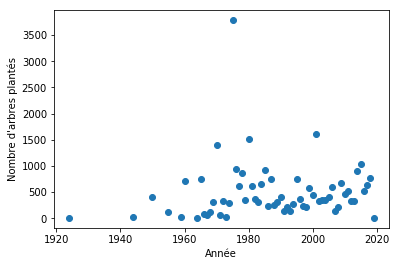

In [143]:
fig, ax = plt.subplots() 
ax.scatter(
    [int(annee) for annee in annees if annee!=''], 
    [int(plantation_annee[annee]['tot']) for annee in annees if annee!='']
)
ax.set_xlabel('Année')
ax.set_ylabel("Nombre d'arbres plantés")
plt.show()

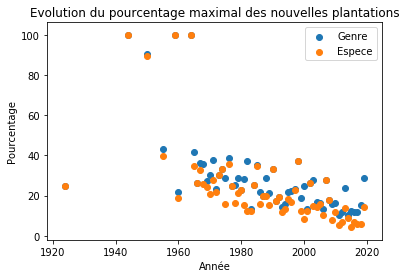

In [152]:
fig, ax = plt.subplots() 
ax.scatter(
    [int(annee) for annee in annees if annee!=''], 
    [int(plantation_annee[annee]['max_genre'])/int(plantation_annee[annee]['tot'])*100 
     for annee in annees if annee!=''],
    label = 'Genre'
)
ax.scatter(
    [int(annee) for annee in annees if annee!=''], 
    [int(plantation_annee[annee]['max_espece'])/int(plantation_annee[annee]['tot'])*100 
     for annee in annees if annee!=''],
    label = 'Espece'
)
ax.set_xlabel('Année')
ax.set_ylabel("Pourcentage")
ax.legend()
ax.set_title('Evolution du pourcentage maximal des nouvelles plantations')
plt.show()

In [160]:
def population_annee(annee) :
    """return the total number of trees and the number of the over-represented
    genre and specie that year, taking into account the removed trees"""
    tot = 0
    genre = {}
    espece = {}
    for row in data_dict :
        if row['ANNEEDEPLANTATION']!='' and int(row['ANNEEDEPLANTATION'])<=annee :
            # l'arbre a ete plante cette annee ou avant
            if row['ANNEEABATTAGE']=='' or int(row['ANNEEABATTAGE'])>annee :
                #l'arbre existe encore cette annee
                tot+=1
                #on ajoute son genre
                if row['GENRE_BOTA'] in genre :
                    genre[row['GENRE_BOTA']] += 1
                else :
                    genre[row['GENRE_BOTA']] = 1
                #on ajoute son espece
                if row['GENRE_BOTA']+" "+row['ESPECE'] in espece :
                    espece[row['GENRE_BOTA']+" "+row['ESPECE']] += 1
                else :
                    espece[row['GENRE_BOTA']+" "+row['ESPECE']] = 1
    #print(tot, genre, espece)
    return(
        tot,
        max(genre.items(), key=operator.itemgetter(1))[1],
        max(espece.items(), key=operator.itemgetter(1))[1],
    )

In [178]:
population_annee(1965)

(2040, 892, 809)

In [166]:
pop_evo = []
genre_evo = []
espece_evo = []
for ann in range(1924,2020) :
    pop,gen,esp = population_annee(ann)
    pop_evo.append(pop)
    genre_evo.append(gen)
    espece_evo.append(esp)

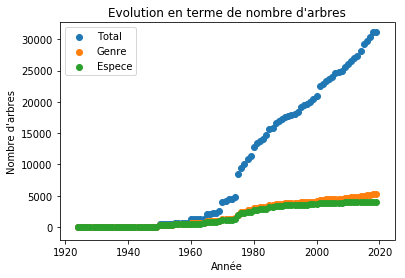

In [171]:
fig,ax = plt.subplots()
ax.scatter(range(1924,2020),pop_evo,label='Total')
ax.scatter(range(1924,2020),genre_evo,label='Genre')
ax.scatter(range(1924,2020),espece_evo,label='Espece')

ax.set_xlabel('Année')
ax.set_ylabel("Nombre d'arbres")
ax.legend()
ax.set_title("Evolution en terme de nombre d'arbres")
plt.show()

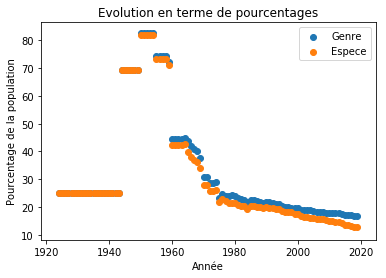

In [172]:
pour_gen = [gen/tot*100 for (gen,tot) in zip(genre_evo,pop_evo)]
pour_esp = [esp/tot*100 for (esp,tot) in zip(espece_evo,pop_evo)]

fig,ax = plt.subplots()
ax.scatter(range(1924,2020),pour_gen,label='Genre')
ax.scatter(range(1924,2020),pour_esp,label='Espece')

ax.set_xlabel('Année')
ax.set_ylabel("Pourcentage de la population")
ax.legend()
ax.set_title("Evolution en terme de pourcentages")
plt.show()

In [177]:
print(f"A l'heure actuelle, il y a {pour_gen[-1]:.1f} % du genre prédominant",
      f"et {pour_esp[-1]:.1f} % de l'espèce prédominante.")

A l'heure actuelle, il y a 16.8 % du genre prédominant et 12.8 % de l'espèce prédominante.


Conclusions de ce travail :
- Le nombre d'arbres sur la métropole est en constante augmentation depuis 1924.
- Depuis 1960, la politique de plantation des arbres a visé à réduire les pourcentages du genre et de l'espèce dominants, passant ces valeurs de 45% à moins de 20%.
- L'objectif de la métropole est atteint en terme de genre (16.8 % du genre dominant) mais pas en terme d'espèce (12.8 %).